<img src="https://ecogenomics.github.io/CheckM/img/checkm.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Catota, Lidia** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**03-08-2022**

<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 
- Agregue el logo de la Universidad
<img src="ikiam.png" width=300 height=240 />
- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 


## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 países

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [1]:
# Escriba aquí su código para el ejercicio 1

import Bio
from Bio.Seq import Seq
from Bio import Entrez
import re

def download_pubmed (keyword):
    """
    Funcion que pide como entrada las palabra de busqueda en tipo "str" en la base de datos de PUBMED y como output crea un documento 
    que contiene informcacion de la  busqueda
    """ 
    Entrez.email = "lidia.catota@est.ikiam.edu.ec"
    handle = Entrez.esearch(db="pubmed", 
                        term=keyword+"[Title]",## se trabajo unicamente con titulos para delimitar la informacion y evitar gasto computacional 
                        retmax=543,
                        usehistory="y")
    record = Entrez.read(handle)
    id_list = record["IdList"]
    webenv = record["WebEnv"]
    query_key = record["QueryKey"]
    handle = Entrez.efetch(db="pubmed",
                       rettype="medline", 
                       retmode="text", 
                       retstart=0,
                       retmax=543, 
                       webenv=webenv,
                       query_key=query_key)

    out_handle = open("data/"+keyword, "w")
    data = handle.read()
    handle.close()
    out_handle.write(data)
    out_handle.close()
    return id_list

import re 
import csv 
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from collections import Counter
def map_science(data):
    """
    Funcion que pide como entrada la data de la funcion download_pubmed() y como resultado muestra un grafico de dispersion 
    con la nacionalidad.  
    """ 
    with open("data/"+data, errors="ignore") as l: 
        texto = l.read()
    texto = re.sub(r"\n\s{6}", " ", texto)
    countries_1 = re.findall (r"AD\s{2}-\s[A-Za-z].*,\s([A-Za-z]*)\.\s", texto)
    unique_countries = list(set(countries_1))
    conteo=Counter(countries_1)
    resultado={}
    ## crearemos un diccionario que tendra su key (pais), con su respectivo values (contador)
    for clave in conteo:  
        valor=conteo[clave]
        if valor > 1:
            resultado[clave] = valor
    #colocamos una funcion que nos responda con la longitud y latitud de los paises encontrados
    lugar = Nominatim(user_agent="my_user_agent")
    long = []
    lat = []
    count = []
    for i in resultado.keys():
        lugar = Nominatim(user_agent="my_user_agent")
        loc = lugar.geocode(i)
        long.append(loc.longitude)
        lat.append(loc.latitude)
    for i in resultado.values(): 
        count.append(i*100)
    #return (count)
    plt.scatter(long, lat, s = count, c=count)
    plt.colorbar()
    ## valores de referencia de cinco paises 
    ard = dict(arrowstyle="->")
    plt.annotate('Ecuador', xy = (-79.3666965, -1.3397668), 
               xytext = (-80.25, 20.05), arrowprops = ard)
    plt.annotate('USA', xy = ( -74.006, 40.714), 
               xytext = (-40, 37.4292), arrowprops= ard)
    plt.annotate('Canada', xy = (-107.991707, 61.0666922), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
    plt.annotate('Japon', xy = (138.252924, 36.204824), 
               xytext = (-100.6847, 30.8369), arrowprops= ard)
    plt.annotate('Egipto', xy = (26.820553, 30.802498), 
               xytext = (10.33, 47.61), arrowprops= ard)
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
    return (plt.savefig("img/"+data, dpi=150, bbox_inches='tight'))
    plt.show()












In [5]:
import miningscience as msc 
help(download_pubmed)
help(map_science)

Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Funcion que pide como entrada la frase de busqueda en la base de datos del NCBI, especificamente PUBMED y como output crea un documento 
    que contiene informcacion de la  busqueda

Help on function map_science in module __main__:

map_science(data)
    Funcion que pide como entrada la data de la funcion download_pubmed y como resultado muestra un grafico de dispersion 
    con la nacionalidad. Los puntos del grafico son mas grandes acorde cambiaba la frecuencia.




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [4]:
# Escriba aquí su código para el ejercicio 2

download_pubmed ("Ecuador bioinformatics") 

print ("el numero de articulos para Ecuador bioinformatics es:", len(download_pubmed ("Ecuador bioinformatics")) )

download_pubmed ("Ecuador structural")

print ("el numero de articulos para Ecuador structural es:", len(download_pubmed ("Ecuador structural")) )













el numero de articulos para Ecuador bioinformatics es: 2
el numero de articulos para Ecuador structural es: 36


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

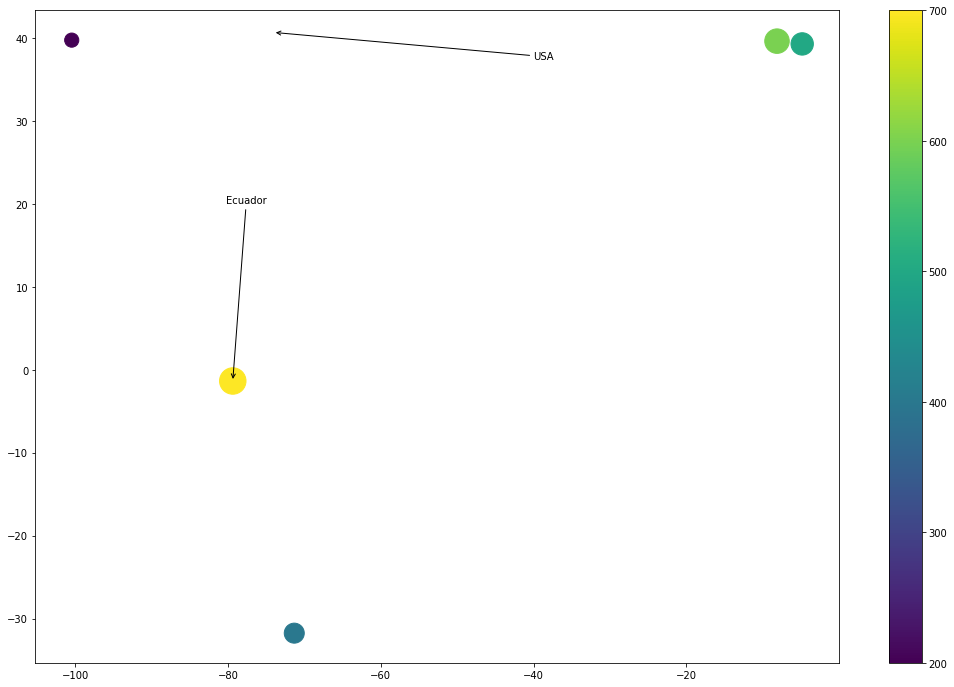

In [2]:
# Escriba aquí su código para el ejercicio 3
map_science("Ecuador bioinformatics")  


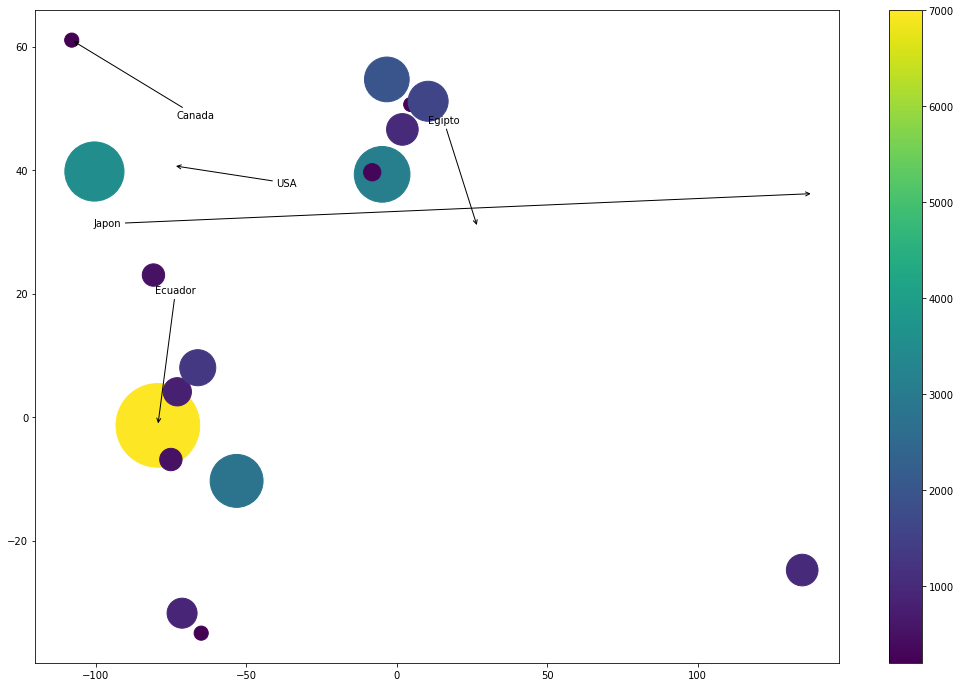

In [3]:
map_science("Ecuador structural")

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*
En la primera busqueda de "Ecuador bioinformatics" se obtuvieron unicamente 2 articulos, por lo tanto, se obtuvieron solo cinco paises. La informacion es la esperada debido a que la bioinformatica en Ecuador es una area poco utilizada por los investigadores debido a varios factores, siendo la mas importante la limitada cantidad de recursos computacionales. 

En la segunda busqueda de "Ecuador structural" se obtuvieron 36 articulos. Siendo Ecuador el que mas veces aparecio debido al "keyword" utilizado. 

.

.

## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [7]:
# Escriba aquí su código para el ejercicio 6

from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline
with open("sequence.seq") as f:
    data = f.readlines()[0:15]
out_sequence = open("secuencias.fasta", "w")
for linea in data:  
    Entrez.email="lidia.catota@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

In [8]:
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias.aln", "clustal")
print(ClustalAlign)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=secuencias.fasta
Alignment with 15 rows and 5222 columns
AAATACAGGGTCTTCCGCATGAGGACACACTAAGGAAACTGCAT...--- XM_045385250.1
-----CAGGGTCTTCCGCATGAGGACACACTAAGGAAACTGCAT...--- XM_045385249.1
----------------------------------------GCAT...ATA NM_001012659.2
--------------------------------------------...--- XM_045558716.1
--------------------------------------------...--- XM_048794484.1
--------------------------------------------...--- XM_046457839.1
--------------------------------------------...--- XM_043874402.1
--------------------------------------------...--- XM_043473096.1
--------------------------------------------...--- XM_025266926.3
--------------------------------------------...--- XM_036448316.1
--------------------------------------------...--- XM_045851910.1
--------------------------------------------...--- XM_024577922.1
--------------------------------------------...--- XM_014829523.2
----------------------------

In [10]:
from Bio import Phylo
arbol = Phylo.read("secuencias.dnd", "newick")

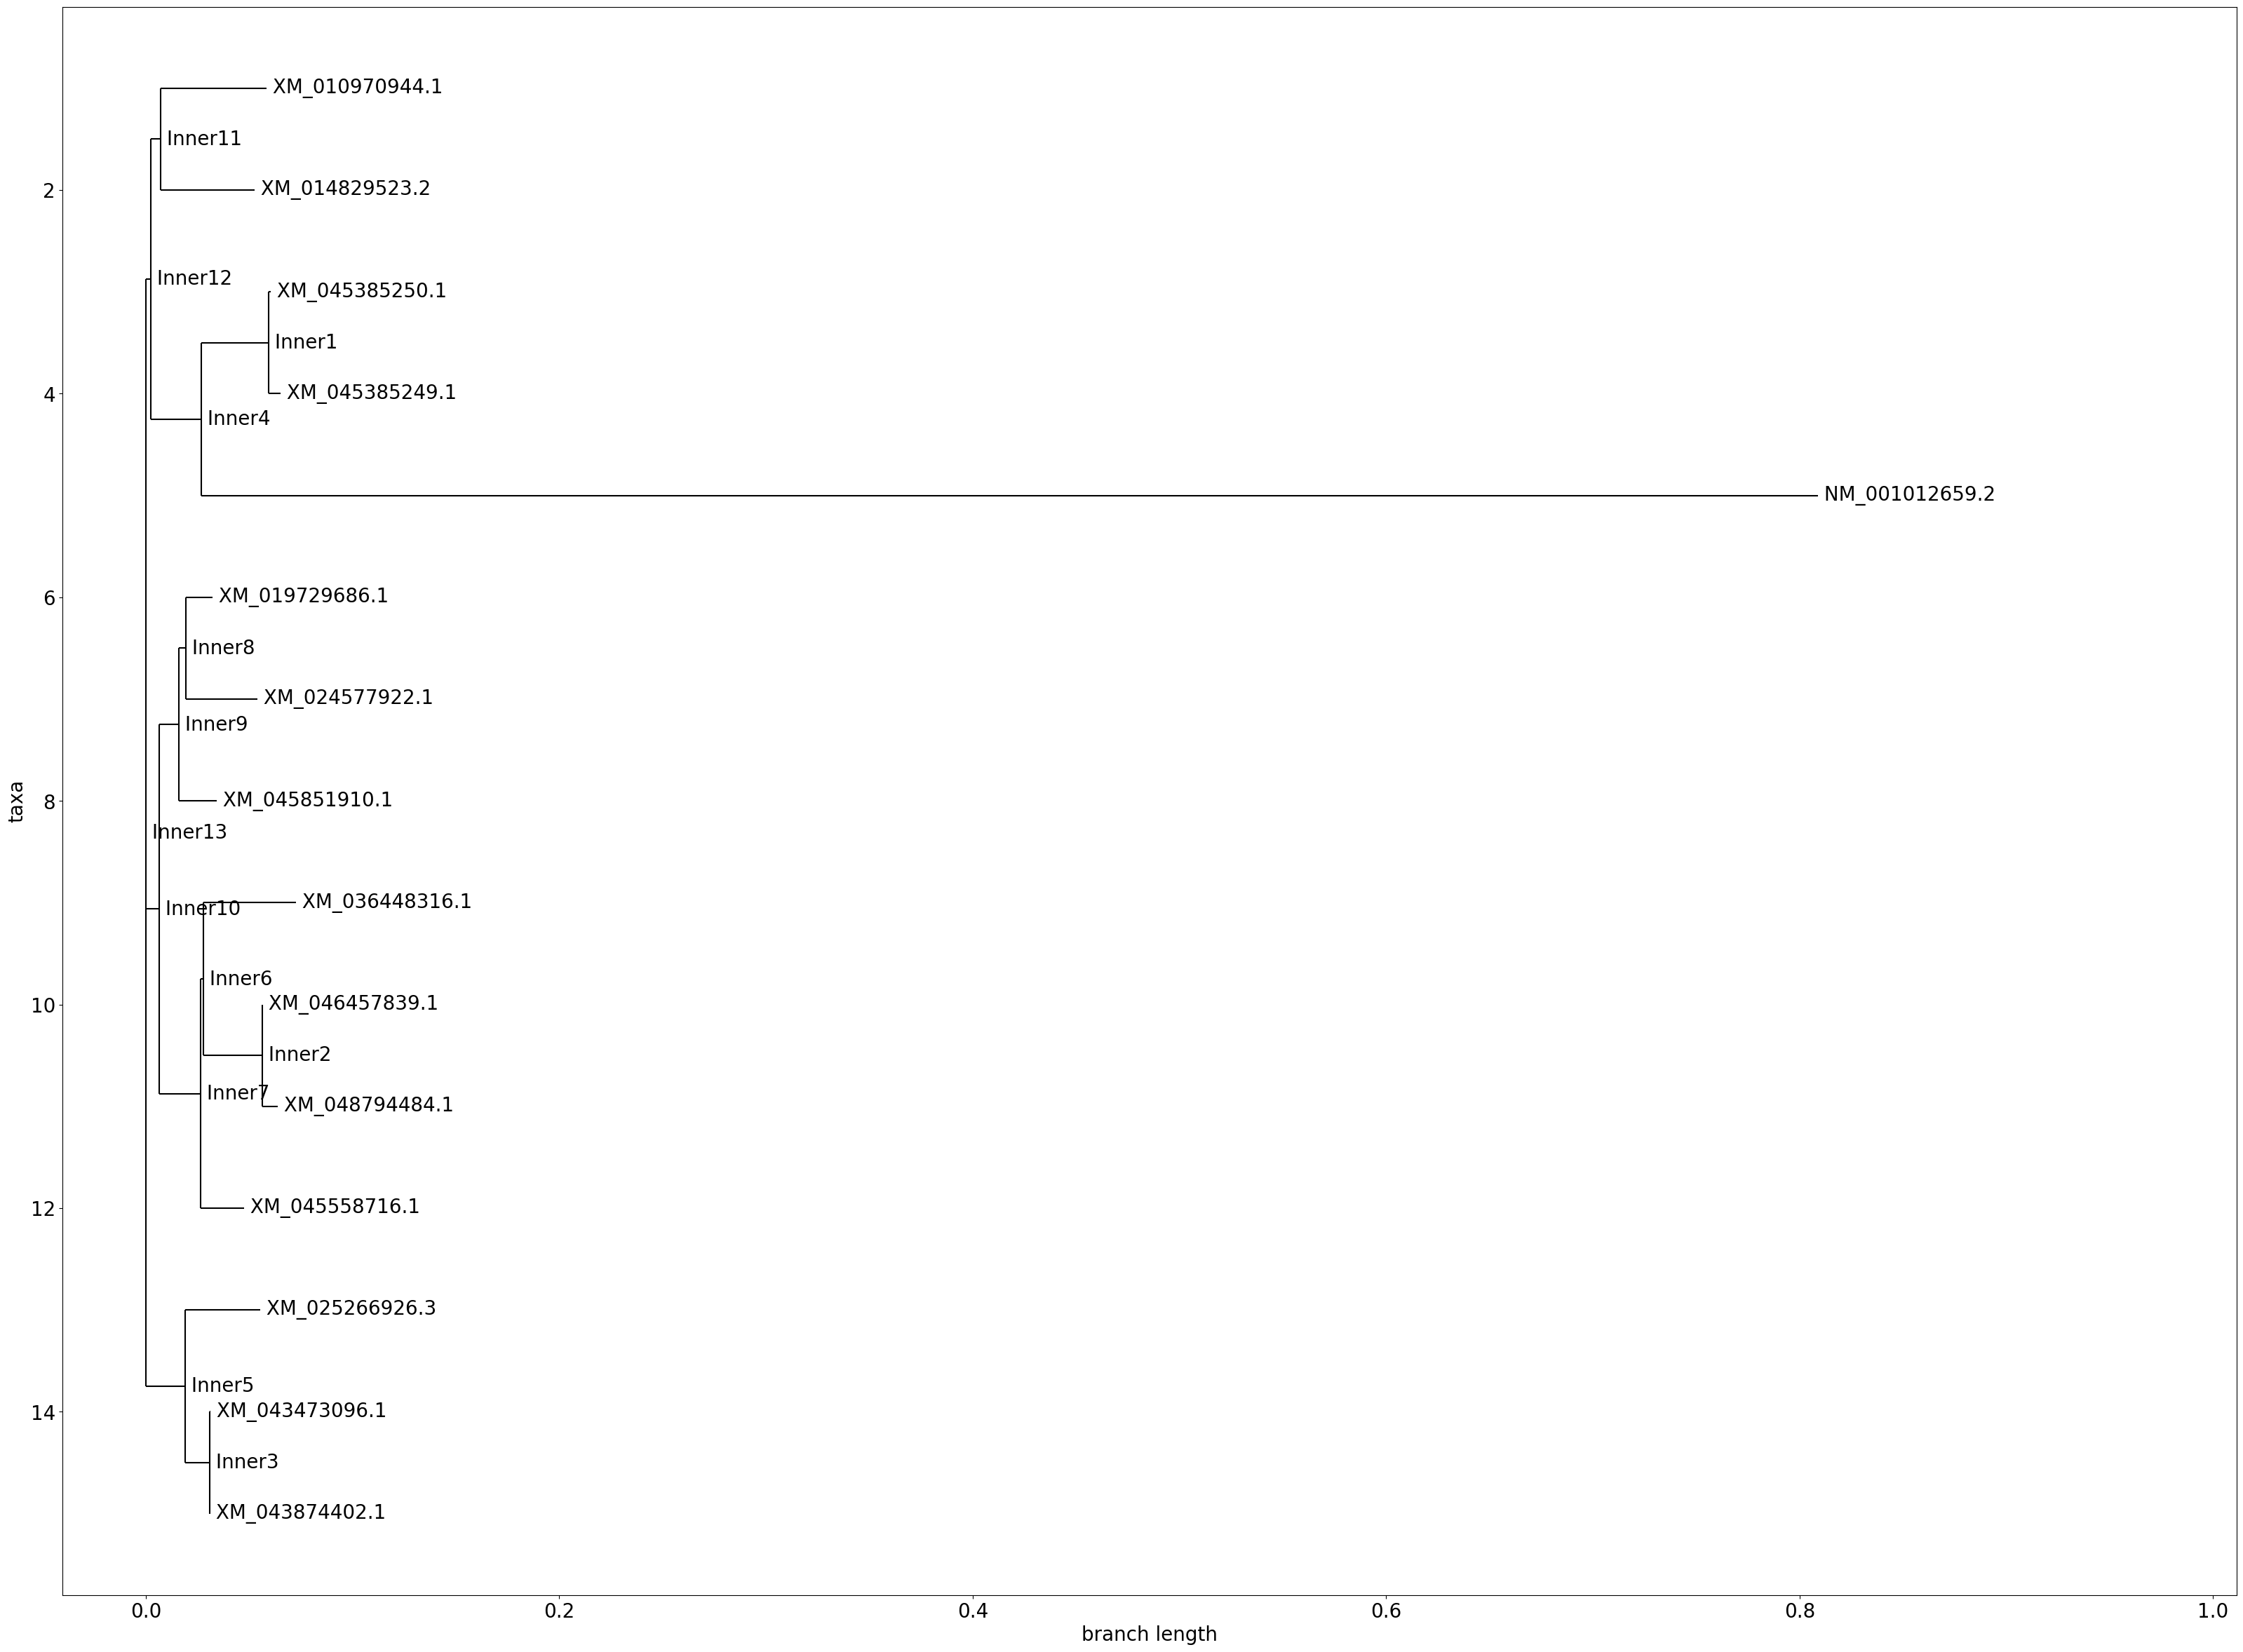

In [12]:
with open("secuencias.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
arg_tree = constructor.build_tree(alignment)
arg_tree.rooted = True
Phylo.write(arg_tree, "arbol.xml", "phyloxml")

arg_tree = Phylo.read(file="arbol.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
#fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(40, 30), dpi=100) 
matplotlib.rc('font', size=20)              
matplotlib.rc('xtick', labelsize=20)       
matplotlib.rc('ytick', labelsize=20)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(arg_tree, axes=axes)
fig.savefig("img/arg_tree.jpg")

**Escriba aquí la interpretación del árbol**

Se utilizo el gen Arg1 que sintetiza el arginine-fifty homeobox involucrado en el ciclo glucolitico. El arbol indica 13 clados mostrando que existe alta divergencia en todas las secuencias analizando, por lo que se puede inferir que casi todas las secuencias provienen de distintos organismos.  

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
